In [1]:
#Import everything
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
def get_data(file, pt_id):
        
    '''
    This function extracts and processes data for a single patient from a multi tab spreadsheet
    pt_id is the patient ID
    '''
    
    filename = pd.read_excel(file, sheet_name = pt_id)
    filename['Plate'] = filename['Plate.1']
    filename.drop(columns = ['Plate.1'], inplace = True)
    #Create plottable well coordinates
    a = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
    b = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
    alpha_rep = dict(zip(a,b))
    x_well = []
    y_well = []
    locs = []
    for row in filename.itertuples():
        r = re.split('(\d+)',row.Well)
        x_well.append(r[1])
        y_well.append(r[0])
        l = r[0]
        ls = alpha_rep[l]
        locs.append(str(ls) + ',' + str(r[1]))
    filename['x_well'] = x_well
    filename['y_well'] = y_well
    filename['locs'] = locs
    filename['y_well'] = filename['y_well'].replace(alpha_rep)

    return filename

def good_wells(data, pt_id, reads, any_all): 
    
    '''
    This function gives a visual QC output of which wells containing 'good' cells.
    data is the filtered dataframe that contains only the 'good' wells
    pt_id is the patient ID
    '''
    
    #make a dictionary for labelling
    p = ['AS-203',
 'AS-204',
 'AS-202',
 'AS-205',
 'AS-206',
 'AS-209',
 'AS-207',
 'AS-208',
 'AS-210',
 'AS-215',
 'AS-216',
 'AS-217',
 'AS-214',
 'AS-219',
 'AS-222',
 'AS-218',
 'AS-223',
 'AS-221',
 'AS-189',
 'AS-195',
 'AS-187',
 'AS-193',
 'AS-194',
 'AS-196',
 'AS-197',
 'AS-198',
 'AS-201']
    c = ['NEs',
 'NEs',
 'Monocytes',
 'Monocytes',
 'nBCs',
 'nBCs',
 'CD34+',
 'CD34+',
 'CD34+/38-',
 'NEs',
 'NEs',
 'Monocytes',
 'Monocytes',
 'nBCs',
 'nBCs',
 'CD34',
 'CD34+halfCD38-',
 'CD34+halfCD38-',
 'NEs',
 'NEs',
 'Monocytes',
 'Monocytes',
 'nBCs',
 'nBCs',
 'CD34',
 'CD34',
 'CD34+/38-']
    
    plate_key = dict(zip(p, c))
    
    #count the plates
    
    plates = data['Plate'].drop_duplicates().to_list()

    fig, ax = plt.subplots(5, 2, figsize = (16,25))
    ax = ax.ravel()
    fig.subplots_adjust(hspace = 0.3, wspace=.3)

    xwell = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    ywell = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
    allwells = []

    for a in ywell: #this creates a list of all possible locations
        for b in xwell:
            allwells.append(str(a) + ','+ str(b))

    #Read in files and plot the data for each

    for count, plat in enumerate(plates):
        data2 = data.loc[data['Plate'].isin([plat])]
        locs = data2['locs'].drop_duplicates().to_list()
        cel = plate_key[plat]
        
        for well in allwells:
            if well in locs:  #if the well is in the list of good wells the colour will be darker
                alpha = 0.8
            else:
                alpha = 0.1        #plot the wells in a lighter shade

            y, x = well.split(',')
            ax[count].scatter(x, y, alpha=alpha, color='gray') 
        axtitle = f'{pt_id} - {plat} - {cel}'
        ax[count].set_title(axtitle)
        ax[count].invert_yaxis()  #flip the axis so the plate order looks natural
        ax[count].set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'])
        ax[count].set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'])

    #In the last plot put 'bad' wells that never gave reads that met criteria
    locs = data['locs'].drop_duplicates().to_list()

    for well in allwells:
        if well in locs:  #if the well is in the list of good wells the colour will be darker
            alpha = 0.1
        else:
            alpha = 0.8        #plot the wells in a lighter shade

        y, x = well.split(',')
        ax[9].scatter(x, y, alpha=alpha, color='gray') 

    ax[9].set_title(f'{pt_id} - Bad wells')
    ax[9].invert_yaxis()  #flip the axis so the plate order looks natural
    ax[9].set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'])
    ax[9].set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'])    
        
        
    plt.subplots_adjust(top=0.95)
    fig.savefig(f'../Results/{pt_id}_good_wells_{reads}_{any_all}.png',dpi=300)     
    
    return

In [3]:
#This needs to be the location of the data file
file = '../Results/All_pt_read_per_amplicon.xlsx'

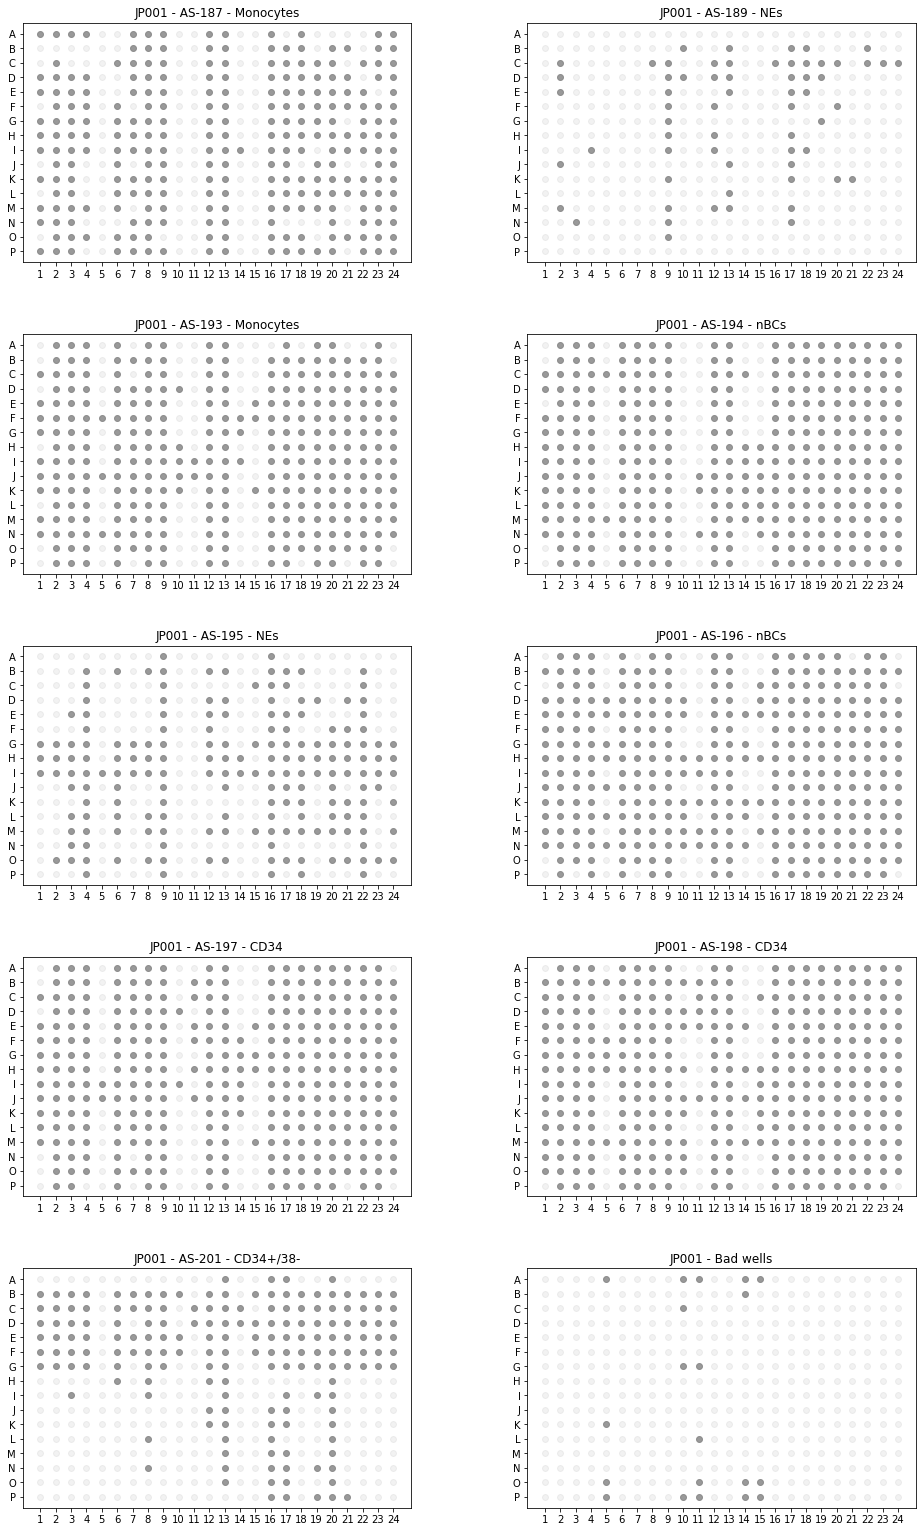

In [5]:
#Input data for patient JP001
pt_id = 'JP001'
reads = 10
any_all = 'all'  #for file label, note here is using any or all during well selections
JP001amps = ['JP001_RUNX1_c', 'JP001_RUNX1_g','JP001_SRSF2', 'JP001_TET2a', 'JP001_TET2b_c', 'JP001_TET2b_g']
JP001cols = ['JP001_RUNX1_g','JP001_SRSF2', 'JP001_TET2a'] #These are the amplicons being considered
#Fetch plate data
JP001plate = get_data(file, pt_id)
#Select wells of interest - for lower stringency replace all with any ie/ any amplicon has at least x reads
JP001sel = JP001plate.loc[(JP001plate[JP001cols] >= reads).all(axis=1)]
#Plot the good wells
good_wells(JP001sel, pt_id, reads, any_all)

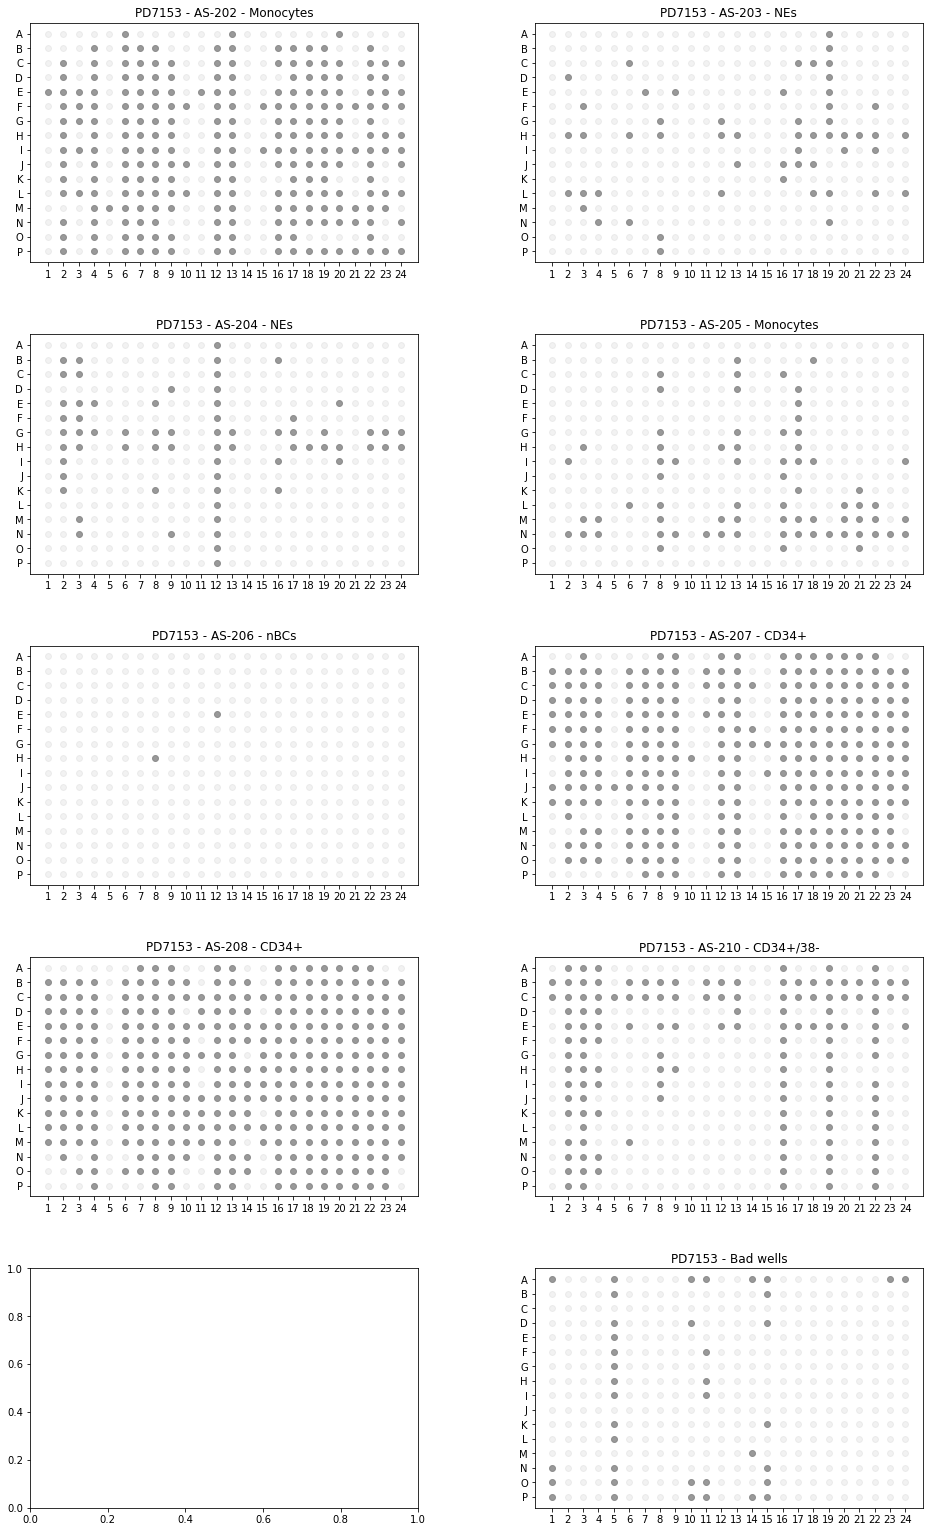

In [6]:
#Input data for patient PD7153
pt_id = 'PD7153'
reads = 10
any_all = 'all'  #for file label, note here is using any or all during well selections
PD7153amps = ['PD7153_CUX1', 'PD7153_SRSF2','PD7153_TET2a', 'PD7153_TET2b', 'PD7153_TGFB3_c', 'PD7153_TGFB3_g']
PD7153cols = ['PD7153_SRSF2','PD7153_TET2a', 'PD7153_TET2b']  #These are the amplicons being considered
#PD7153cols = ['PD7153_CUX1']
#PD7153cols = ['PD7153_TGFB3_g']
#Fetch plate data
PD7153plate = get_data(file, pt_id)
#Select wells of interest - for lower stringency replace all with any ie/ any amplicon has at least x reads
PD7153sel = PD7153plate.loc[(PD7153plate[PD7153cols] >= reads).all(axis=1)]
#Plot the good plates
good_wells(PD7153sel, pt_id, reads, any_all)

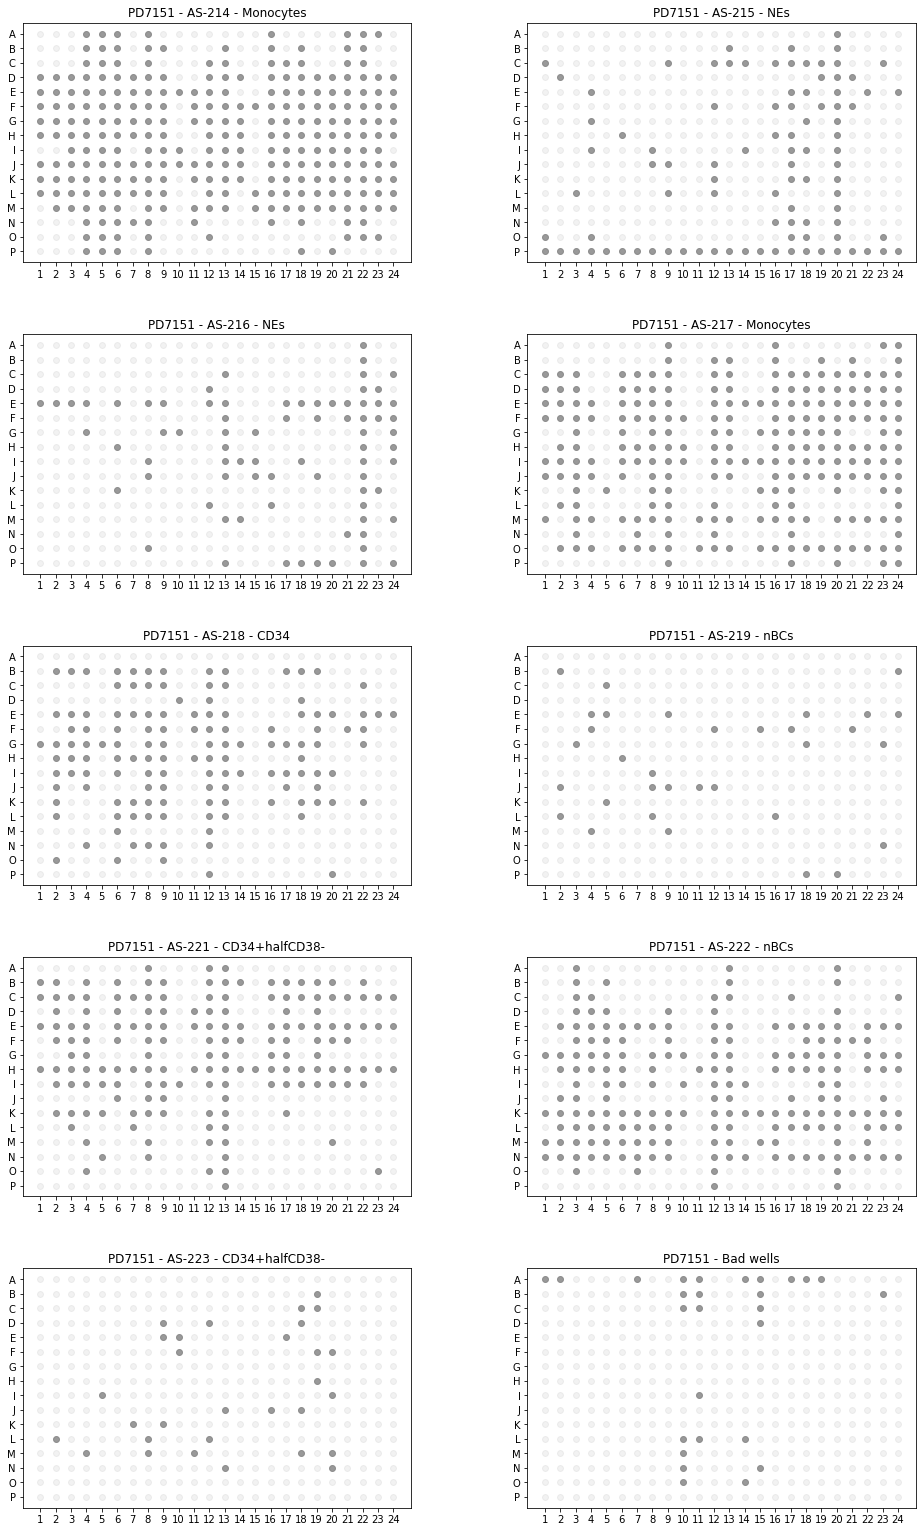

In [7]:
#Input data for patient PD7151
pt_id = 'PD7151'
reads = 10
any_all = 'all'  #for file label, note here is using any or all during well selections
PD7151amps = ['PD7151_TET2a', 'PD7151_TET2b']
PD7151cols = ['PD7151_TET2a', 'PD7151_TET2b'] #These are the amplicons being considered
#Fetch plate data
PD7151plate = get_data(file, pt_id)
#Select wells of interest - for lower stringency replace all with any ie/ any amplicon has at least x reads
PD7151sel = PD7151plate.loc[(PD7151plate[PD7151cols] >= reads).all(axis=1)]
#Plot the good plates
good_wells(PD7151sel, pt_id, reads, any_all)